<a href="https://colab.research.google.com/github/AndreiPopa1906/NeuralNetworks/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

## Data

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
# <aka dataFrame using pandas

import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


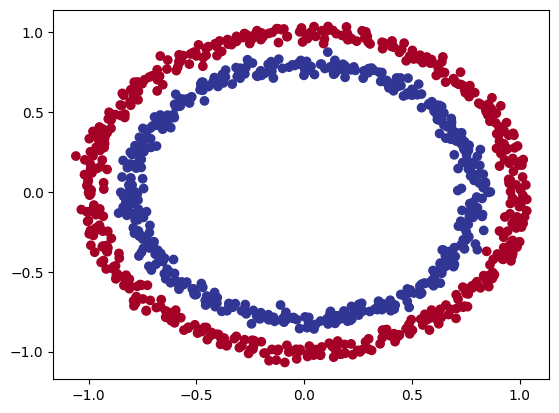

In [ ]:
import matplotlib.pylab as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [ ]:
import torch
import numpy as np
torch.__version__

'2.3.1+cu121'

In [ ]:
X.dtype

dtype('float64')

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

## Build a model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.layer_2(self.layer_1(x)))

model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# Replicating the model in less code
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=128, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=256, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=128, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=1, bias=True),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
# Make predictions

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0368, -0.3417],
                      [ 0.4036,  0.3438],
                      [-0.1776, -0.3313],
                      [-0.0106,  0.3831],
                      [-0.5190, -0.1288],
                      [-0.6520, -0.2259],
                      [ 0.0558,  0.3672],
                      [-0.5746,  0.1334],
                      [ 0.0025,  0.0750],
                      [ 0.0267, -0.6598],
                      [-0.5348, -0.4456],
                      [-0.5210,  0.4824],
                      [ 0.1564, -0.3363],
                      [-0.5364, -0.4312],
                      [ 0.3911, -0.3719],
                      [-0.0616, -0.2671],
                      [-0.2409,  0.2275],
                      [ 0.5891, -0.1156],
                      [-0.0441,  0.6017],
                      [ 0.3067, -0.2833],
                      [-0.5885, -0.3598],
                      [-0.3516,  0.2486],
                      [ 0.1130, -0.0736],
        

In [ ]:
with torch.inference_mode():
    untrained_preds = model_0(torch.from_numpy(X_test).type(torch.float).to(device))
print(f"Length of predictions:  {len(untrained_preds)}, SHape: {untrained_preds.shape}")
print(f"Predictions: {untrained_preds[:10]}")
print(f"Actual values: {torch.tensor(y_test[:10])}")

Length of predictions:  200, SHape: torch.Size([200, 1])
Predictions: tensor([[-0.0532],
        [-0.0393],
        [-0.0698],
        [-0.0443],
        [-0.0516],
        [-0.0365],
        [-0.0191],
        [-0.0092],
        [-0.0692],
        [-0.0386]])
Actual values: tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])


In [ ]:
# Loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.0001)


In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(torch.from_numpy(X_test).type(torch.float).to(device))
# y_pred = torch.round(y_logits)
y_logits

tensor([[-0.0532],
        [-0.0393],
        [-0.0698],
        [-0.0443],
        [-0.0516],
        [-0.0365],
        [-0.0191],
        [-0.0092],
        [-0.0692],
        [-0.0386],
        [-0.0529],
        [-0.0478],
        [-0.0125],
        [-0.0734],
        [-0.0696],
        [-0.0241],
        [-0.0386],
        [-0.0592],
        [-0.0612],
        [-0.0666],
        [-0.0388],
        [-0.0082],
        [-0.0649],
        [-0.0638],
        [-0.0298],
        [-0.0170],
        [-0.0672],
        [-0.0219],
        [-0.0698],
        [-0.0719],
        [-0.0343],
        [-0.0300],
        [-0.0498],
        [-0.0640],
        [-0.0528],
        [-0.0419],
        [-0.0460],
        [-0.0727],
        [-0.0644],
        [-0.0729],
        [-0.0653],
        [-0.0681],
        [-0.0392],
        [-0.0531],
        [-0.0492],
        [-0.0404],
        [-0.0460],
        [-0.0383],
        [-0.0449],
        [-0.0438],
        [-0.0455],
        [-0.0477],
        [-0.

In [ ]:
X_test[:5]

array([[-0.37519302,  0.68265972],
       [ 0.01538035,  0.96002602],
       [-0.7027836 , -0.31471699],
       [-0.28525015,  0.96637754],
       [ 0.40241682, -0.74375355]])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4867],
        [0.4902],
        [0.4825],
        [0.4889],
        [0.4871],
        [0.4909],
        [0.4952],
        [0.4977],
        [0.4827],
        [0.4903],
        [0.4868],
        [0.4881],
        [0.4969],
        [0.4817],
        [0.4826],
        [0.4940],
        [0.4903],
        [0.4852],
        [0.4847],
        [0.4834],
        [0.4903],
        [0.4980],
        [0.4838],
        [0.4840],
        [0.4925],
        [0.4958],
        [0.4832],
        [0.4945],
        [0.4826],
        [0.4820],
        [0.4914],
        [0.4925],
        [0.4876],
        [0.4840],
        [0.4868],
        [0.4895],
        [0.4885],
        [0.4818],
        [0.4839],
        [0.4818],
        [0.4837],
        [0.4830],
        [0.4902],
        [0.4867],
        [0.4877],
        [0.4899],
        [0.4885],
        [0.4904],
        [0.4888],
        [0.4890],
        [0.4886],
        [0.4881],
        [0.4961],
        [0.4853],
        [0.4931],
        [0

In [ ]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(torch.from_numpy(X_test).type(torch.float).to(device))))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
epochs = 200

X_train = torch.from_numpy(X_train).type(torch.float).to(device) if torch.is_tensor(X_train) == False else X_train
X_test = torch.from_numpy(X_test).type(torch.float).to(device) if torch.is_tensor(X_test) == False else X_test
y_train = torch.from_numpy(y_train).type(torch.float).to(device) if torch.is_tensor(y_train) == False else y_train
y_test = torch.from_numpy(y_test).type(torch.float).to(device) if torch.is_tensor(y_test) == False else y_test

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    loss = loss_fn(y_logits, y_train).to(device)


    y_pred = torch.round(torch.sigmoid(y_logits).to(device))
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_test, test_pred)

        if epoch % 20 == 0:
            test_loss = loss_fn(test_logits, y_test)
            print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test loss: {test_loss} | Test accuracy: {accuracy_fn(y_test, test_pred)}")

Epoch: 0 | Loss: 0.6942698955535889 | Accuracy: 50.0 | Test loss: 0.6945340633392334 | Test accuracy: 50.0
Epoch: 20 | Loss: 0.6879714131355286 | Accuracy: 50.0 | Test loss: 0.6896142363548279 | Test accuracy: 50.0
Epoch: 40 | Loss: 0.6807340383529663 | Accuracy: 55.25 | Test loss: 0.6836514472961426 | Test accuracy: 54.0
Epoch: 60 | Loss: 0.6690908670425415 | Accuracy: 73.25 | Test loss: 0.6737111806869507 | Test accuracy: 70.5
Epoch: 80 | Loss: 0.6496798992156982 | Accuracy: 84.875 | Test loss: 0.6562818884849548 | Test accuracy: 81.0
Epoch: 100 | Loss: 0.619048535823822 | Accuracy: 96.375 | Test loss: 0.6286041736602783 | Test accuracy: 95.0
Epoch: 120 | Loss: 0.5734485387802124 | Accuracy: 99.375 | Test loss: 0.5869112610816956 | Test accuracy: 98.0
Epoch: 140 | Loss: 0.5119275450706482 | Accuracy: 99.75 | Test loss: 0.530447244644165 | Test accuracy: 99.0
Epoch: 160 | Loss: 0.43781909346580505 | Accuracy: 99.875 | Test loss: 0.4622351825237274 | Test accuracy: 99.5
Epoch: 180 | Lo

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


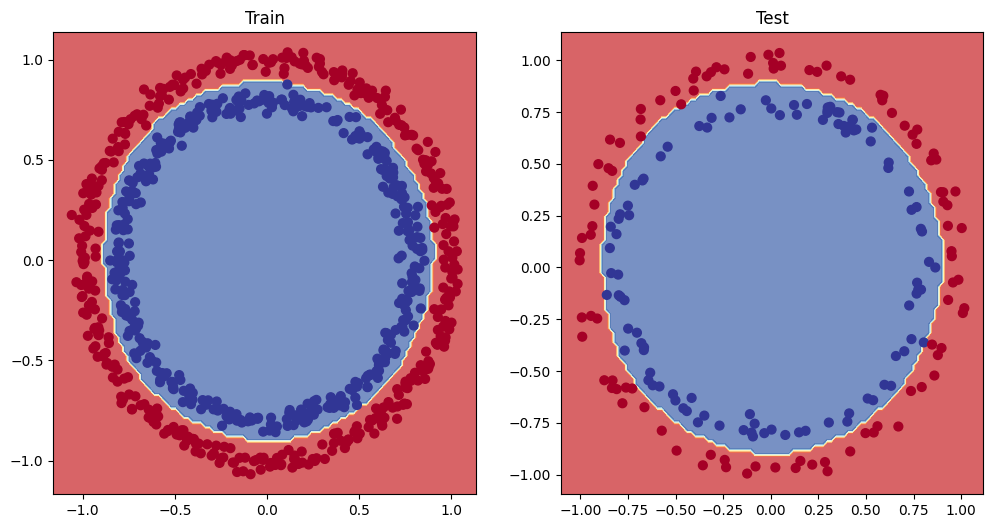

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

